In [87]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [7]:
cwd = os.getcwd()
df = pd.read_csv(f'{cwd}/Car details v3.csv')
print(df)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage

In [9]:
df.shape

(8128, 13)

In [10]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [11]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [12]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [14]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape 

(7906, 13)

In [17]:
float('23.4')

23.4

In [19]:
float('23.4 kmpl'.split(" ")[0])

23.4

In [20]:
df['mileage'] = df['mileage'].str.split(" ").str[0]

In [21]:
df['mileage'].head(10)

0     23.4
1    21.14
2     17.7
3     23.0
4     16.1
5    20.14
6     17.3
7     16.1
8    23.59
9     20.0
Name: mileage, dtype: object

In [23]:
df['engine'] = df['engine'].str.split(" ").str[0]

In [24]:
df['engine'].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

In [25]:
df['max_power'] = df['max_power'].str.split(" ").str[0]

In [26]:
df['max_power'].head(10)

0        74
1    103.52
2        78
3        90
4      88.2
5     81.86
6      57.5
7        37
8      67.1
9      68.1
Name: max_power, dtype: object

In [27]:
df.drop('torque', axis=1, inplace=True)

In [28]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3,1061,57.5,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1,796,37,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.1,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0,1399,68.1,5.0


In [50]:
df['mileage'] = df['mileage'].astype('float')
df['engine'] = df['engine'].astype('float')
df['max_power'] = df['max_power'].astype('float')
df['seats'] = df['seats'].astype('int')

In [30]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [31]:
df['name'] = df['name'].str.split(" ").str[0]

In [32]:
df['name'].value_counts()

Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: name, dtype: int64

In [33]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [51]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats              int32
dtype: object

In [36]:
# Number of Maruti cars sold year by year

Ford = df[df['name'] == 'Ford']

In [38]:
#To find the trend of increases or decrease in the data 
#For example to find the No of Ford cars year wise in 2nd Hand market 

In [39]:
Ford['year'].nunique()

18

In [41]:
Ford['year'].unique()

array([2013, 2017, 2015, 2020, 2018, 2011, 2010, 2016, 2012, 2014, 2019,
       2009, 2006, 2003, 2008, 2005, 2007, 2004], dtype=int64)

In [42]:
df['year'].unique().min()

1994

So the oldest car which was up for sale is made in 1994

In [44]:
df['year'].unique().max()

2020

Conclusion 

In [45]:
Ford.groupby('year').count()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
year,,,,,,,,,,,
2003,3,3,3,3,3,3,3,3,3,3,3
2004,2,2,2,2,2,2,2,2,2,2,2
2005,3,3,3,3,3,3,3,3,3,3,3
2006,3,3,3,3,3,3,3,3,3,3,3
2007,4,4,4,4,4,4,4,4,4,4,4
2008,7,7,7,7,7,7,7,7,7,7,7
2009,9,9,9,9,9,9,9,9,9,9,9
2010,23,23,23,23,23,23,23,23,23,23,23
2011,48,48,48,48,48,48,48,48,48,48,48


In [46]:
Ford.groupby('year').count()[['name']]

,name
year,
2003,3
2004,2
2005,3
2006,3
2007,4
2008,7
2009,9
2010,23
2011,48


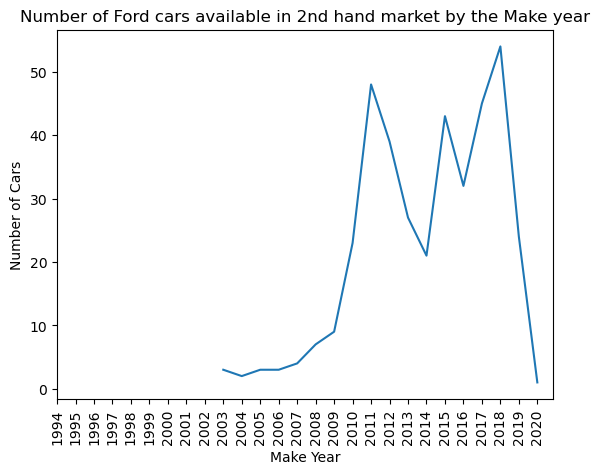

In [48]:
plt.plot(Ford.groupby('year').count()['name'].index, Ford.groupby('year').count()['name'].values)


plt.xlabel('Make Year')
plt.ylabel('Number of Cars')
plt.title('Number of Ford cars available in 2nd hand market by the Make year')
plt.xticks(list(range(1994,2021)), rotation=90)

plt.show()

In [52]:
df['seats'].value_counts()

5     6254
7     1120
8      235
4      133
9       80
6       62
10      19
2        2
14       1
Name: seats, dtype: int64

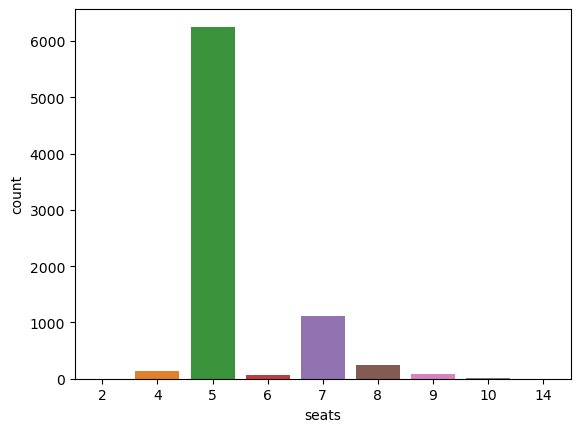

In [53]:
sns.countplot(x=df['seats'])
plt.show()

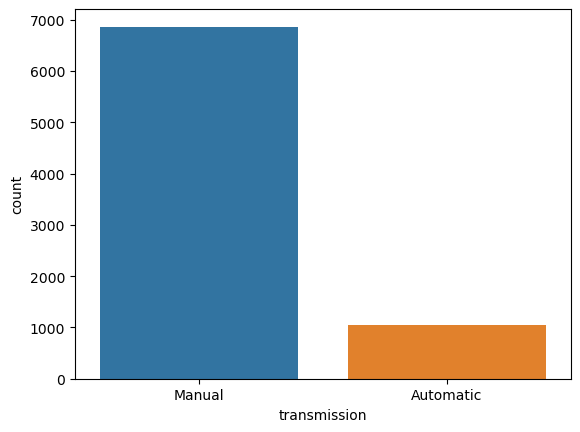

In [54]:
sns.countplot(x=df['transmission'])
plt.show()

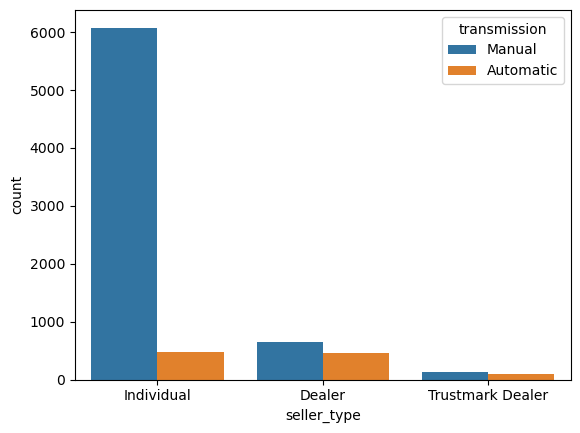

In [56]:
sns.countplot(data=df, x = 'seller_type', hue='transmission')
plt.show()

Average price of car in Diesel vs Pertorl for Maruthi,Hyundair,Tata and  Ford

In [57]:
subdf = df[df['name'].isin(['Maruti','Hyundai', 'Mahindra', 'Ford'])]

In [58]:
subdf['name'].value_counts()

Maruti      2367
Hyundai     1360
Mahindra     758
Ford         388
Name: name, dtype: int64

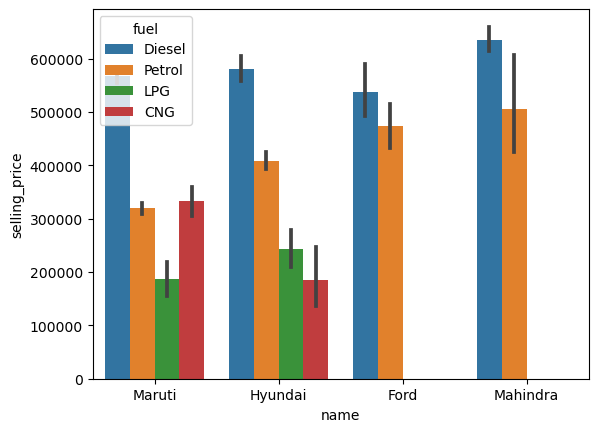

In [60]:
sns.barplot(data=subdf, x = 'name', y = 'selling_price', hue='fuel')
plt.show()

In [61]:
subdf = subdf[subdf['fuel'].isin(['Diesel','Petrol'])]
# subdf.groupby(['name','fuel'])['selling_price'].mean()
# subdf.head()
carslist = []
for car in subdf['name'].unique():
    sublist = []
    petrolavg = subdf[(subdf['name'] == car) & (subdf['fuel'] == 'Petrol')]['selling_price'].mean()
    dieselavg = subdf[(subdf['name'] == car) & (subdf['fuel'] == 'Diesel')]['selling_price'].mean()
    sublist.extend([car, petrolavg, dieselavg])
    carslist.append(sublist)

In [62]:
carslist

[['Maruti', 319685.22484385845, 567742.9825581395],
 ['Hyundai', 408453.8894348894, 581490.4924242424],
 ['Ford', 473178.198019802, 537658.4912891986],
 ['Mahindra', 504843.75, 635538.5275482094]]

In [63]:
prices = pd.DataFrame(carslist, columns = ['Brand','Petrol','Diesel'])
prices.head()

,Brand,Petrol,Diesel
0,Maruti,319685.224844,567742.982558
1,Hyundai,408453.889435,581490.492424
2,Ford,473178.198020,537658.491289
3,Mahindra,504843.750000,635538.527548


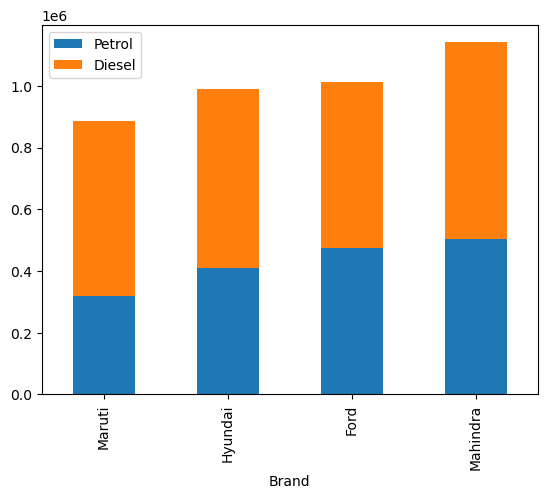

In [64]:
prices.set_index('Brand').plot(kind='bar', stacked=True)
plt.show()

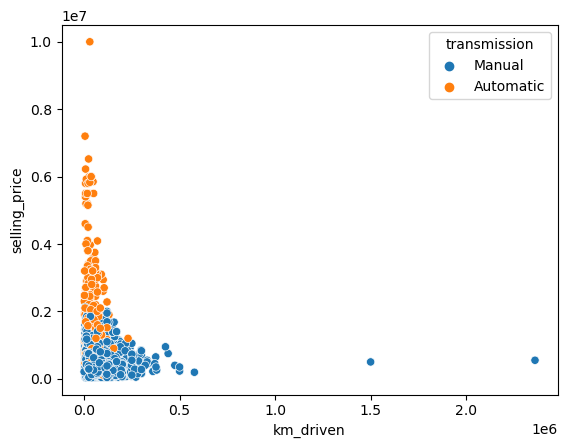

In [66]:
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='transmission')
plt.show()

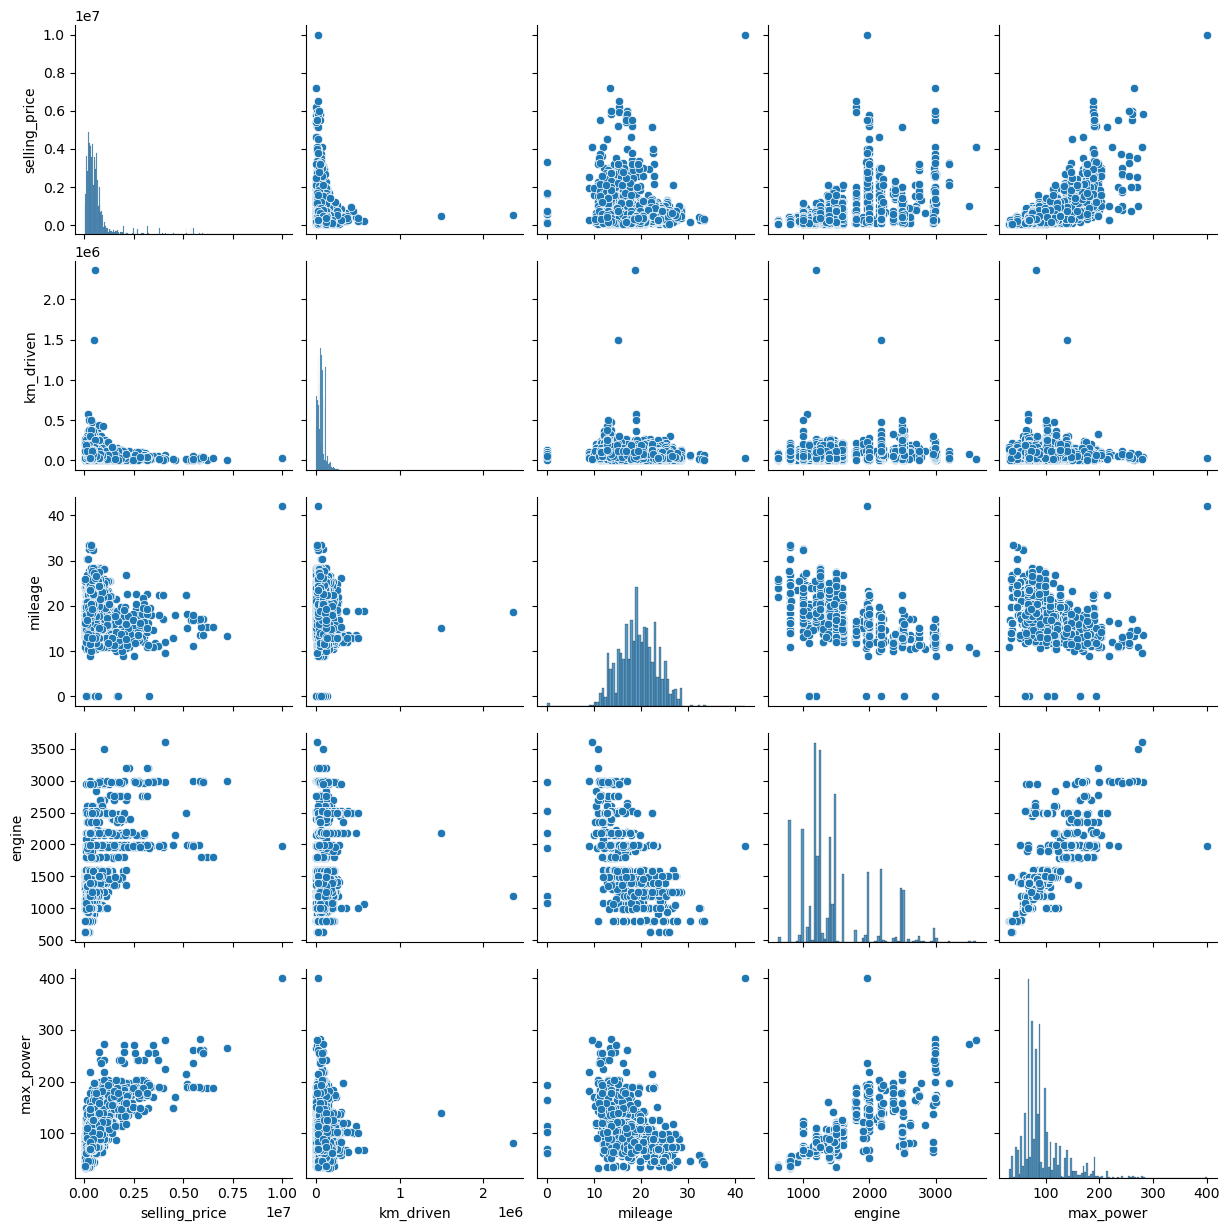

In [65]:
num_cols = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']

sns.pairplot(df[num_cols])
plt.show()

In [98]:
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,5,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,5,1,0,0,1,0,1,0,1,0,0
2,158000,140000,17.70,1497.0,78.00,5,0,0,1,1,0,1,0,0,0,1
3,225000,127000,23.00,1396.0,90.00,5,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,5,0,0,1,1,0,1,0,0,0,0


In [94]:
final_df = df.copy()            # Creating copy of created dataframe
final_df.drop(labels= ['name','year'], axis= 1, inplace= True)          #droping unnecessary features

final_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5


In [99]:
# Let's check data types of variables
final_df.dtypes

selling_price                     int64
km_driven                         int64
mileage                         float64
engine                          float64
max_power                       float64
seats                             int32
fuel_Diesel                       uint8
fuel_LPG                          uint8
fuel_Petrol                       uint8
seller_type_Individual            uint8
seller_type_Trustmark Dealer      uint8
transmission_Manual               uint8
owner_Fourth & Above Owner        uint8
owner_Second Owner                uint8
owner_Test Drive Car              uint8
owner_Third Owner                 uint8
dtype: object

In [102]:
# Converting the datatypes of variables as of required datatype
final_df['fuel_Diesel'] = final_df['fuel_Diesel'].astype('int64')
final_df['fuel_Petrol'] = final_df['fuel_Petrol'].astype('int')
final_df['seller_type_Individual'] = final_df['seller_type_Individual'].astype('int64')
final_df['transmission_Manual'] = final_df['transmission_Manual'].astype('int64')


In [103]:
X = final_df.iloc[:, 1:]            # Feature matrix (independent variables)
y = final_df.iloc[:, 0]             # Target variable (dependent variable)

In [104]:
# To check important feature
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [105]:
print(model.feature_importances_)

[1.12269931e-01 5.16224853e-02 8.27859650e-02 3.10461463e-01
 1.41609224e-02 3.36182091e-02 2.51741570e-05 2.44236855e-02
 2.84289035e-02 3.10156307e-03 3.02796339e-01 1.91091355e-03
 2.37955746e-02 6.21567347e-03 4.38319814e-03]


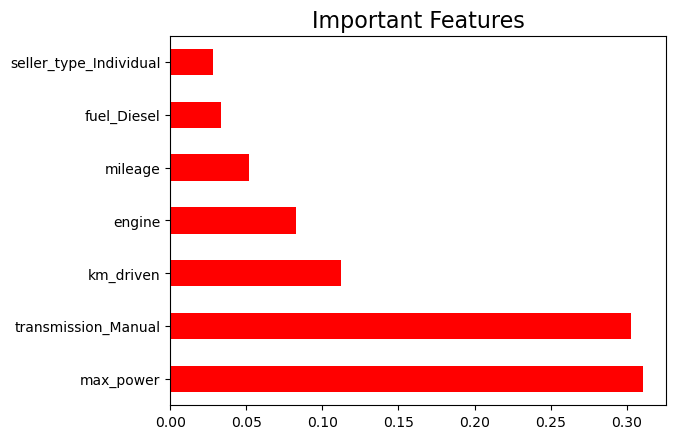

In [106]:
#plot graph of feature importances for better visualization

imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [111]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

In [112]:
# create a new DataFrame from the above three lists
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()

,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score / Accuracy
Models,,,,
Linear Regression,2.438113e+11,493772.493629,0.675847,0.675601
Support Vector Rregression,7.974698e+11,893011.653235,0.000227,-0.061059
Decision Tree Regressor,7.690308e+10,277314.045281,0.897778,0.897678
Random Forest Regressor,5.037723e+10,224448.721957,0.933039,0.932971
Ridge,2.437089e+11,493668.844724,0.675973,0.675738


In [108]:
X_train.head()

,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
7167,57000,17.80,1198.0,86.70,5,0,0,1,1,0,1,0,0,0,0
2128,22000,21.56,1462.0,103.25,5,0,0,1,1,0,1,0,1,0,0
29,25000,16.80,796.0,34.20,8,0,0,1,1,0,1,0,0,0,0
2482,25000,18.60,1197.0,81.83,5,0,0,1,1,0,1,0,1,0,0
6755,250000,13.93,2179.0,138.00,7,1,0,0,1,0,1,0,0,0,0


I have seen that Random Forest Regressor have minimum 'RMSE' and high accuracy. So, I decided to use Random Forest Regressor as Machine Learning Model.

In [109]:
y_train.head()

7167    475000
2128    650000
29      254999
2482    555000
6755    295000
Name: selling_price, dtype: int64

In [113]:
regressor = RandomForestRegressor()

## Hyperparameters 
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]
regressor = RandomForestRegressor()

## Hyperparameters 
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [114]:
# Create the random grid
random_grid= {'n_estimators': n_estimators, 
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [115]:
regressor_random = RandomizedSearchCV(estimator=  regressor, param_distributions=  random_grid, scoring= 'neg_mean_squared_error', \
                                      n_iter = 10, cv=5, verbose = 2, random_state=42, n_jobs=1)
regressor_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [116]:
y_predictions = regressor_random.predict(X_test)
y_predictions

array([ 129802.99946865,  285126.1975    ,  201613.23476622, ...,
       1479545.78761905,  475185.88388889,  847228.56791352])

Predicting Test Data by Visualizing 

Text(0.5, 1.0, 'True value Vs Predicted values of Selling Price')

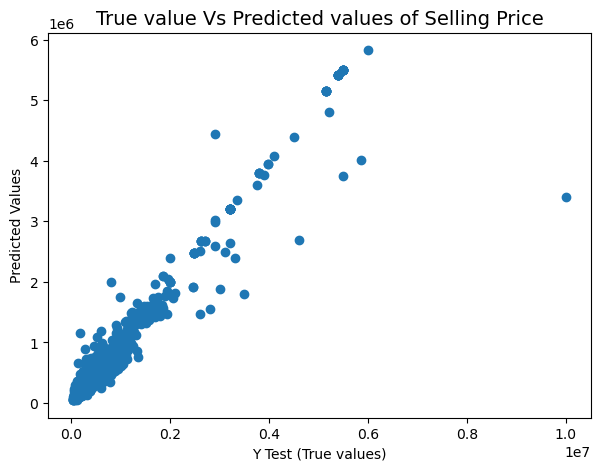

In [117]:
plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= y_predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')
plt.title('True value Vs Predicted values of Selling Price', fontsize=14)

<Axes: xlabel='selling_price', ylabel='Density'>

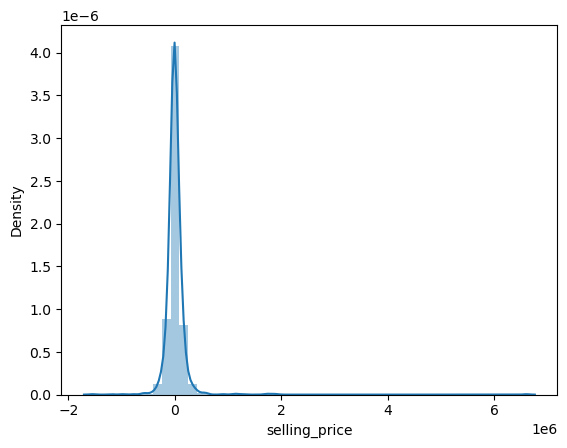

In [118]:
sns.distplot(y_test - y_predictions)

MODEL EVALUATION



In [120]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predictions))
print('Mean Squareed Error: ', mean_squared_error(y_test, y_predictions))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))


Mean Absolute Error:  90009.11824831621
Mean Squareed Error:  55224534094.41176
Root Mean Square Error:  234999.00870942362


In [121]:
print('Accuracy: ', r2_score(y_test, y_predictions))

Accuracy:  0.9265220021004813


In [122]:
import pickle

# open the file where you want to store
file = open('rf_regression_model.pkl', 'wb')

# dump information on that file
pickle.dump(regressor_random, file)